## https://www.kaggle.com/mhajabri/what-do-kagglers-say-about-data-science/notebook

In [67]:
import pandas as pd
import numpy as np
from subprocess import check_call,check_output
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
print("data_file:\n===========================")
print(check_output(["ls","./input/"]))

data_file:
RespondentTypeREADME.txt
conversionRates.csv
freeformResponses.csv
multipleChoiceResponses.csv
schema.csv



In [122]:
cvRates = pd.read_csv('./input/conversionRates.csv', encoding="ISO-8859-1")
freeForm = pd.read_csv('./input/freeformResponses.csv', encoding="ISO-8859-1")
data = pd.read_csv('./input/multipleChoiceResponses.csv', encoding="ISO-8859-1")
schema = pd.read_csv('./input/schema.csv', encoding="utf-8")


Proportion of women in this survey: 16.00%
Proportion of men in this survey: 81.00% 


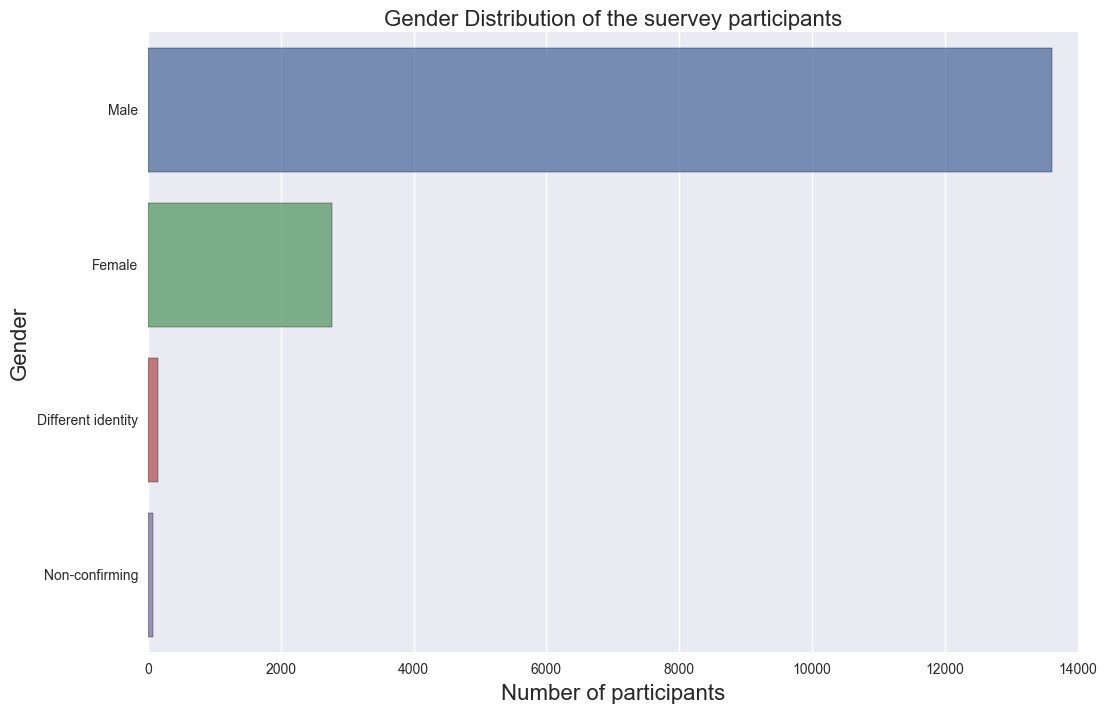

In [56]:
plt.figure(figsize=(12,8))
genders=data.GenderSelect.value_counts()
sns.set_style('darkgrid')
sns.barplot(y=genders.index,x=genders.values,alpha=.8)
plt.yticks(range(len(genders.values.tolist())),("Male","Female",'Different identity','Non-confirming'))
plt.title("Gender Distribution of the suervey participants",fontdict={"fontsize":16})
plt.xlabel("Number of participants",fontsize=16)
plt.ylabel("Gender",fontsize=16)
print('Proportion of women in this survey: {:.2f}%'.format(100*len(data[data['GenderSelect']=='Female'])/len(data['GenderSelect'].dropna())))
print('Proportion of men in this survey: {:0.2f}% '.format(100*len(data[data['GenderSelect']=='Male'])/len(data['GenderSelect'].dropna())))

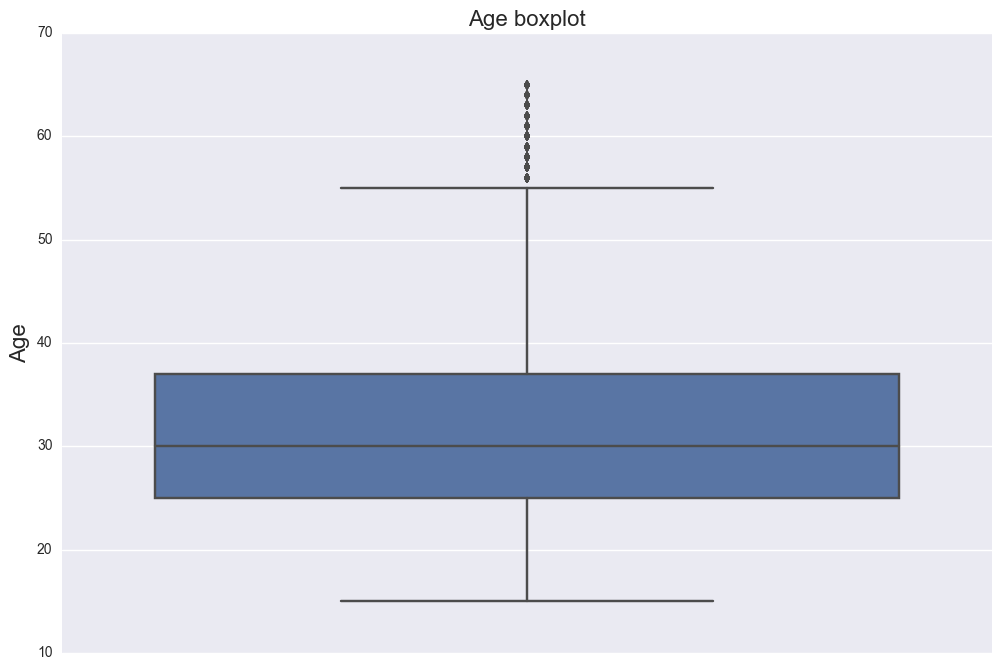

In [60]:
age=data[(data['Age']>=15) & (data['Age']<=65) ]
plt.figure(figsize=(12,8))
sns.boxplot(y=age["Age"],data=age)
plt.title("Age boxplot", fontsize=16)
plt.ylabel("Age", fontsize=16)

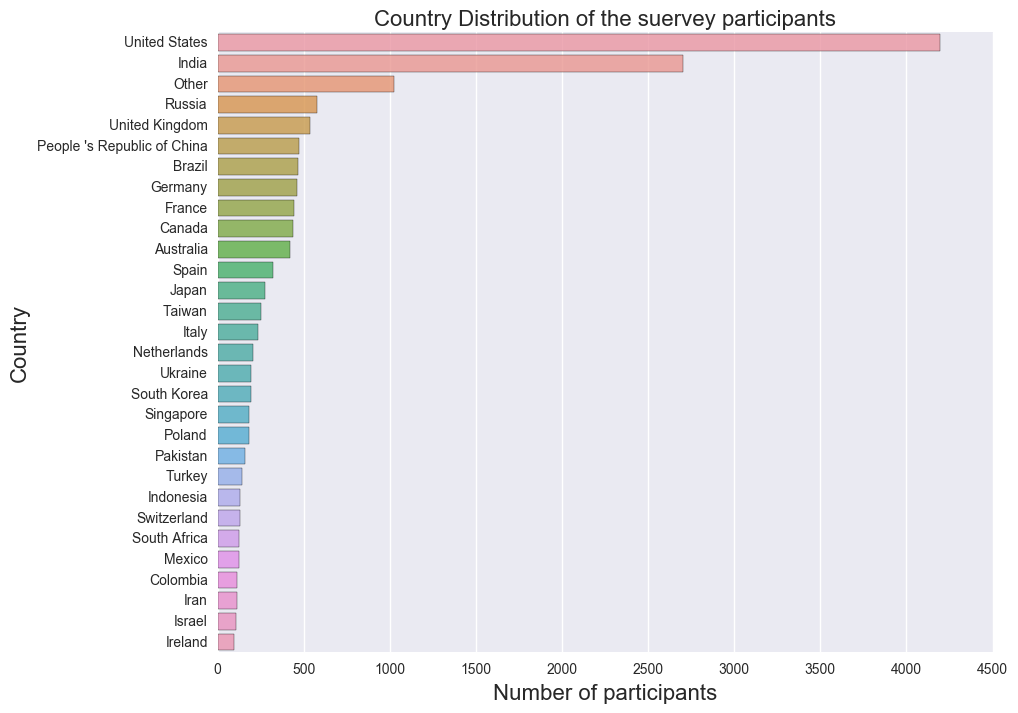

In [64]:
countries = data['Country'].value_counts().head(30)
plt.figure(figsize=(10,8))
sns.barplot(x=countries.values,y=countries.index.tolist(),alpha=0.8)
plt.title("Country Distribution of the suervey participants", fontsize=16)
plt.xlabel("Number of participants", fontsize=16)
plt.ylabel("Country", fontsize=16)


In [94]:
edu = data.FormalEducation.value_counts()
labels=(np.array(edu.index))
values=(np.array((edu / edu.sum())*100))#(np.array(edu.values))
trace=go.Pie(labels=labels,values=values,hoverinfo='label+percent',
               textfont=dict(size=20),
                showlegend=False)
layerout=go.Layout(title="Formal Education of the survey participants")
data_trace=[trace]
fig=go.Figure(data=data_trace,layout=layerout)
py.iplot(figure_or_data=fig,filename="edu")

(-1.25, 1.25, -1.25, 1.25)

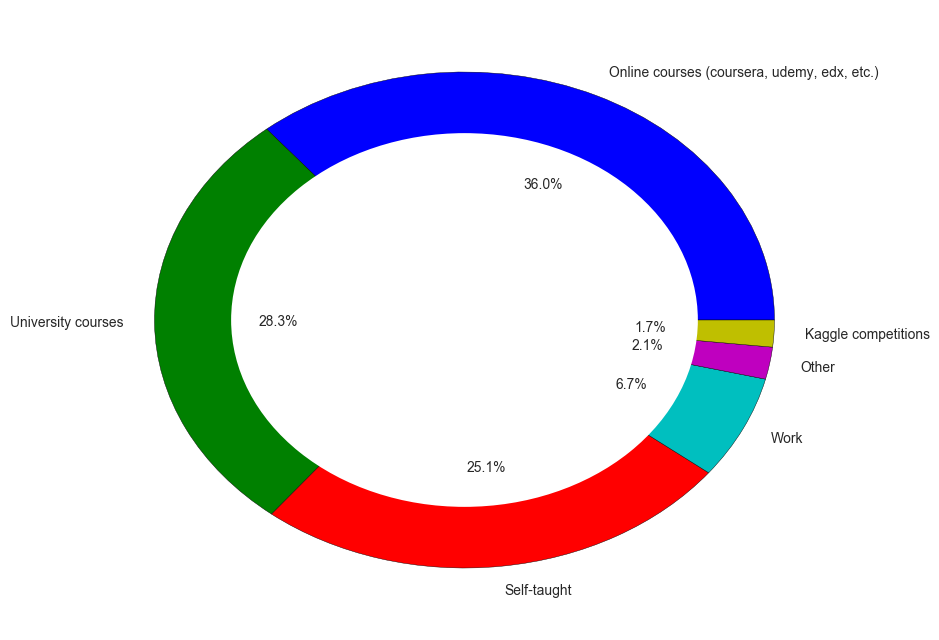

In [115]:
plt.figure(figsize=(10,8))

temp=data['FirstTrainingSelect'].value_counts()
labels = temp.index
sizes = temp.values
plt.pie(sizes,labels=labels,autopct="%1.1f%%")
central_circle=plt.Circle((0,0.0),0.75,color="white",linewidth=1.25)
fig=plt.gcf()
fig.gca().add_artist(central_circle)
plt.axis()

In [121]:
data

[{'hoverinfo': 'label+percent',
  'labels': array([u'Yes', u'No'], dtype=object),
  'marker': {'colors': ['#FEBFB3', '#E1396C'],
   'line': {'color': '#000000', 'width': 2}},
  'type': 'pie',
  'values': array([ 70.58432935,  29.41567065])}]

In [124]:
car = data['CareerSwitcher'].value_counts()
labels = (np.array(car.index))
proportions = (np.array((car / car.sum())*100))
colors = ['#FEBFB3', '#E1396C']
trace=go.Pie(labels=labels,values=proportions,hoverinfo="label+percent",
             marker=dict(colors=colors,line=dict(color='#000000', width=2)))
data_trace=[trace]
layerout=go.Layout(title='Working people looking to switch careers to data science')
fig=go.Figure(data=data_trace,layout=layerout)
py.iplot(fig,filename="Career_Switcher")

In [117]:
?go.Pie